# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
## lets import our core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Overview

- Observations
- Sanity checks

In [3]:
## lets load the data
df = pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
## lets compute the length of the data
len(df)

25480

In [5]:
## lets provide a summary description of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
## lets provide a summary statistics of the data
df.describe().round()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.0,25480.0,25480.0
mean,5667.0,1979.0,74456.0
std,22878.0,42.0,52816.0
min,-26.0,1800.0,2.0
25%,1022.0,1976.0,34015.0
50%,2109.0,1997.0,70308.0
75%,3504.0,2005.0,107736.0
max,602069.0,2016.0,319210.0


In [7]:
## lets check the data types
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [8]:
## lets drop the id column sinces it is irrelevant to our analysis
del df["case_id"]

In [9]:
## lets provide an overview of the data
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### 1. Does education play a role in Visa certification? 

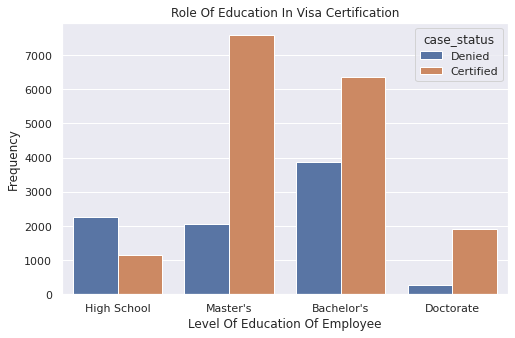

In [10]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x="education_of_employee", hue="case_status")

plt.title("Role Of Education In Visa Certification")
plt.ylabel("Frequency")
plt.xlabel("Level Of Education Of Employee")


plt.show()

### 2. How Does The Visa Status Vary Across Different Continents? 

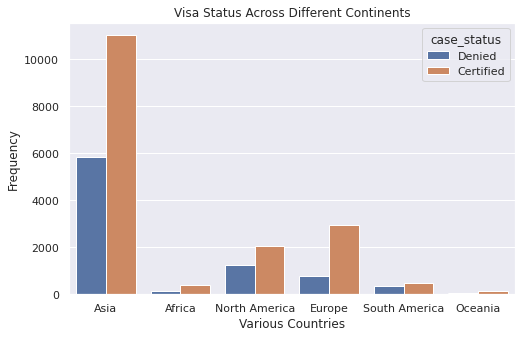

In [11]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x="continent", hue="case_status")

plt.title("Visa Status Across Different Continents")
plt.ylabel("Frequency")
plt.xlabel("Various Countries")


plt.show()

### 3. Does Work Experience Influence Visa Status? 

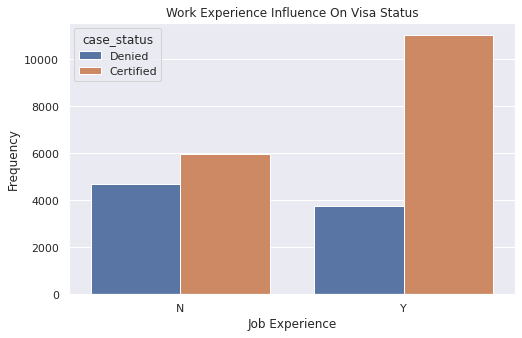

In [12]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x="has_job_experience", hue="case_status")

plt.title("Work Experience Influence On Visa Status")
plt.ylabel("Frequency")
plt.xlabel("Job Experience")


plt.show()

### 4.Which pay unit is most likely to be certified for a visa? 

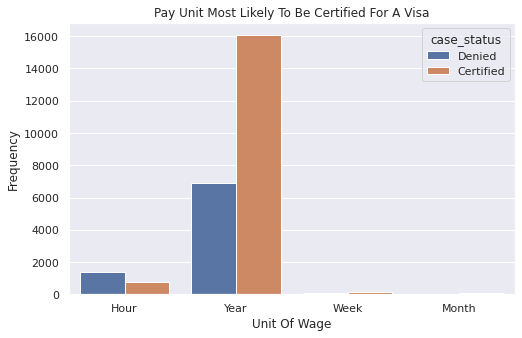

In [13]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x="unit_of_wage", hue="case_status")

plt.title("Pay Unit Most Likely To Be Certified For A Visa")
plt.ylabel("Frequency")
plt.xlabel("Unit Of Wage")


plt.show()

 ### 5.How Does The Visa Status Change With The Prevailing Wage?

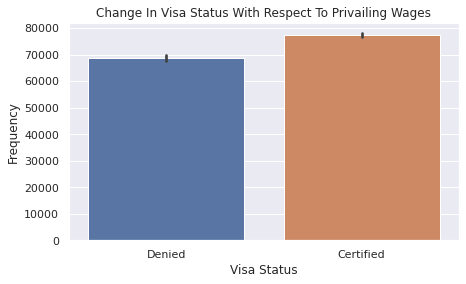

In [14]:
plt.figure(figsize=(7,4))

sns.barplot(data=df, y="prevailing_wage", x="case_status")
plt.title("Change In Visa Status With Respect To Privailing Wages")
plt.ylabel("Frequency")
plt.xlabel("Visa Status")


plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [15]:
## lets make a copy of the dataframe 
data = df.copy()

### Missing Value Check

In [16]:
## let's check for missing values 
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

### Outlier Check 
- Lets check for outliers in the data

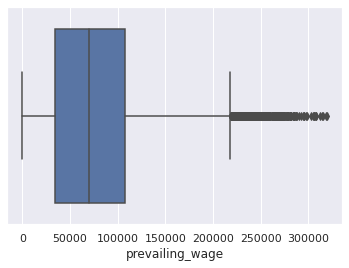

In [17]:
## let's check the outlier distribution on the 
sns.boxplot(x=data["prevailing_wage"])

plt.show()

### Target Variable Conversion 

In [18]:
data.case_status = (data.case_status == "Certified").astype(int)
data.case_status.head()

0    0
1    1
2    0
3    0
4    1
Name: case_status, dtype: int64

### Preparing data for modeling 
- Lets split the data into the following proportion
    - training set 60%
    - validation dataset 20%
    - test data 20%

In [19]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


In [20]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=11)

df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [21]:
print(f'Train set {len(df_train)}')
print(f'Valid set {len(df_valid)}')
print(f'Test set {len(df_test)}')

Train set 15288
Valid set 5096
Test set 5096


### Lets Select all the target 

In [22]:
## lets select the target column from the dataset
y_train = df_train.case_status.values
y_valid = df_valid.case_status.values


In [23]:
## lets delete all the target column from the training data
del df_train['case_status']
del df_valid['case_status']


### Target Variable Analysis 

In [24]:
df_train_full.case_status.value_counts()

1    13601
0     6783
Name: case_status, dtype: int64

### Global Visa Approval Rate

In [25]:
## lets check the global visa approval rate 
global_approval_rate = df_train_full.case_status.mean()
print(f"Visa Global Approval Rate: {round(global_approval_rate, 2)}")

Visa Global Approval Rate: 0.67


### Seperate Data Into Both Categorical And Numerical Data

In [26]:
numerical_var = ["no_of_employees", "yr_of_estab", "prevailing_wage"]

categorical_var = ["continent", "education_of_employee", "has_job_experience", "requires_job_training",
                   "region_of_employment", "unit_of_wage", "full_time_position"]

### Unique Values In Categorical Data

### Feature Importance
We are going to understand how other variable in our dataset affects the target variable book_status. 
- We start by looking at categorical variables by looking at the approval rate for each variable

In [27]:
## lets check for unique values in each categorical variables 
df_train_full[categorical_var].nunique()

continent                6
education_of_employee    4
has_job_experience       2
requires_job_training    2
region_of_employment     5
unit_of_wage             4
full_time_position       2
dtype: int64

#### Job Experience 

In [28]:
df_train_full['has_job_experience'].unique()

array(['Y', 'N'], dtype=object)

In [29]:
yes_job_exp = df_train_full[df_train_full.has_job_experience == 'Y'].case_status.mean()
print(f"Approval Rate For Applicants With Job Experience: {round(yes_job_exp, 3)}")

no_job_exp = df_train_full[df_train_full.has_job_experience == 'N'].case_status.mean()
print(f"Approval Rate For Applicants With No Job Experience: {round(no_job_exp, 3)}")

Approval Rate For Applicants With Job Experience: 0.743
Approval Rate For Applicants With No Job Experience: 0.563


From the above results, we could see that applicants with Job experience have a higher chance of visa approval than those without. 

#### Employees Education 

In [30]:
df_train_full['education_of_employee'].unique()

array(["Master's", 'Doctorate', "Bachelor's", 'High School'], dtype=object)

In [31]:
masters = df_train_full[df_train_full.education_of_employee == "Master's"].case_status.mean()
print(f"Approval Rate For Applicants With Masters Degree: {round(masters, 2)}")

doctorates = df_train_full[df_train_full.education_of_employee == "Doctorate"].case_status.mean()
print(f"Approval Rate For Applicants With Doctorates Degree: {round(doctorates, 2)}")

bachelors = df_train_full[df_train_full.education_of_employee == "Bachelor's"].case_status.mean()
print(f"Approval Rate For Applicants With Bachelors Degree: {round(bachelors, 2)}")

high_school = df_train_full[df_train_full.education_of_employee == "High School"].case_status.mean()
print(f"Approval Rate For Applicants With High School Degree: {round(high_school, 2)}")

Approval Rate For Applicants With Masters Degree: 0.79
Approval Rate For Applicants With Doctorates Degree: 0.87
Approval Rate For Applicants With Bachelors Degree: 0.62
Approval Rate For Applicants With High School Degree: 0.34


#### Continent 

In [32]:
df_train_full['continent'].unique()

array(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'], dtype=object)

In [33]:
asia = df_train_full[df_train_full.continent == 'Asia'].case_status.mean()
print(f"Approval Rate For Applicants From Asia: {round(asia, 2)}")

europe = df_train_full[df_train_full.continent == 'Europe'].case_status.mean()
print(f"Approval Rate For Applicants From 'Europe': {round(europe, 2)}")

north_america = df_train_full[df_train_full.continent == 'North America'].case_status.mean()
print(f"Approval Rate For Applicants From 'North America': {round(north_america, 2)}")

south_america = df_train_full[df_train_full.continent == 'South America'].case_status.mean()
print(f"Approval Rate For Applicants From 'South America': {round(south_america, 2)}")

africa = df_train_full[df_train_full.continent == 'Africa'].case_status.mean()
print(f"Approval Rate For Applicants From 'Africa': {round(africa, 2)}")

oceania = df_train_full[df_train_full.continent == 'Oceania'].case_status.mean()
print(f"Approval Rate For Applicants From 'Oceania': {round(oceania, 2)}")

Approval Rate For Applicants From Asia: 0.65
Approval Rate For Applicants From 'Europe': 0.79
Approval Rate For Applicants From 'North America': 0.62
Approval Rate For Applicants From 'South America': 0.56
Approval Rate For Applicants From 'Africa': 0.73
Approval Rate For Applicants From 'Oceania': 0.65


#### Region of Employment 

In [34]:
df_train_full['region_of_employment'].unique()

array(['West', 'Midwest', 'Northeast', 'South', 'Island'], dtype=object)

In [35]:
west = df_train_full[df_train_full.region_of_employment == 'West'].case_status.mean()
print(f"Approval Rate For Applicant from West: {round(west, 2)}")

mid_west = df_train_full[df_train_full.region_of_employment == 'Midwest'].case_status.mean()
print(f"Approval Rate For Applicant from 'Midwest': {round(west, 2)}")

north_east = df_train_full[df_train_full.region_of_employment == 'Northeast'].case_status.mean()
print(f"Approval Rate For Applicant from 'Northeast': {round(north_east, 2)}")

south = df_train_full[df_train_full.region_of_employment == 'South'].case_status.mean()
print(f"Approval Rate For Applicant from 'South': {round(south, 2)}")

island = df_train_full[df_train_full.region_of_employment == 'Island'].case_status.mean()
print(f"Approval Rate For Applicant from 'Island': {round(island, 2)}")



Approval Rate For Applicant from West: 0.63
Approval Rate For Applicant from 'Midwest': 0.63
Approval Rate For Applicant from 'Northeast': 0.63
Approval Rate For Applicant from 'South': 0.7
Approval Rate For Applicant from 'Island': 0.59


#### Unit Wage 

In [36]:
df_train_full['unit_of_wage'].unique()

array(['Year', 'Hour', 'Week', 'Month'], dtype=object)

In [37]:
year = df_train_full[df_train_full.unit_of_wage == 'Year'].case_status.mean()
print(f'Approval Rate For Applicant from Year: {round(year, 2)}')

hour = df_train_full[df_train_full.unit_of_wage == 'Hour'].case_status.mean()
print(f'Approval Rate For Applicant from Hour: {round(hour, 2)}')

week = df_train_full[df_train_full.unit_of_wage == 'Week'].case_status.mean()
print(f'Approval Rate For Applicant from Week: {round(week, 2)}')

month = df_train_full[df_train_full.unit_of_wage == 'Month'].case_status.mean()
print(f'Approval Rate For Applicant from Month: {round(month, 2)}')

Approval Rate For Applicant from Year: 0.7
Approval Rate For Applicant from Hour: 0.34
Approval Rate For Applicant from Week: 0.61
Approval Rate For Applicant from Month: 0.66


#### Full time Position


In [38]:
df_train_full['full_time_position'].unique()

array(['Y', 'N'], dtype=object)

In [39]:
yes = df_train_full[df_train_full.full_time_position == 'Y'].case_status.mean()
print(f'Approval Rate For Applicant With Full Time Position: {round(yes, 2)}')

no = df_train_full[df_train_full.full_time_position == 'N'].case_status.mean()
print(f'Approval Rate For Applicant from With No Full Time Position: {round(no, 2)}')

Approval Rate For Applicant With Full Time Position: 0.66
Approval Rate For Applicant from With No Full Time Position: 0.69


### Mutual Information 
- Lets quantify the degree of dependency between two categorical variables

In [40]:
from sklearn.metrics import mutual_info_score
from IPython.display import display

def calculate_mi(series):
    return mutual_info_score(series, df_train_full.case_status)

df_mi = df_train_full[categorical_var].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

display(df_mi.head())

,MI
education_of_employee,0.055306
unit_of_wage,0.021406
has_job_experience,0.017806
continent,0.007643
region_of_employment,0.005861


### Correlation Coefficient 
We use correlation coefficient to measure the binary target variable and a numerical variable. 
- A positive correlation means that when one variable goes up, the other variable tends to go up as well
- Negative correlation occurs when one variable goes up and the other goes down. 
- Zero correlatin means no relationship b/n two variables 

In [41]:
df_train_full[numerical_var].corrwith(df_train_full.case_status).to_frame('correlation')


,correlation
no_of_employees,0.008502
yr_of_estab,0.009273
prevailing_wage,0.079406


### Multivariate analysis on the combined dataframe

Text(0.5, 0.98, '')

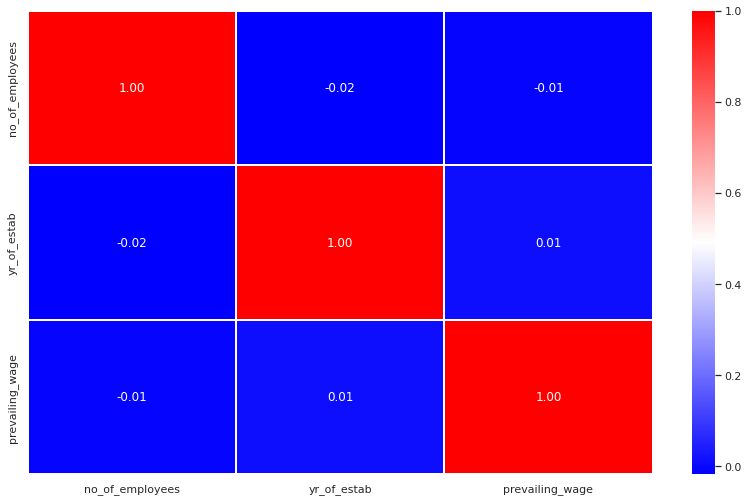

In [42]:
fig, (ax) = plt.subplots(1, 1, figsize=(14,8))

hm = sns.heatmap(df.corr(),
ax=ax,
cmap="bwr",
annot=True,
fmt='.2f',
linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('', fontsize=14, fontweight='bold')

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Feature Engineering 
We are going to use one-hot encoding to convert all categorical variables to numerical variable for training. 
- lets encode our categorical variables in the our dataframe
- Implement our DictVectorizer

In [43]:
df_train = df_train[categorical_var + numerical_var]

In [44]:
## lets convert our training data into a dictionary format 
train_dict = df_train.to_dict(orient="records")
valid_dict = df_valid.to_dict(orient="records")

#### One-hot encoding for categorical variables 

In [45]:
from sklearn.feature_extraction import DictVectorizer

dict_vec = DictVectorizer(sparse=False)

X_train = dict_vec.fit_transform(train_dict)
X_valid = dict_vec.transform(valid_dict)

## Building bagging and boosting models

### Bagging Classifier 

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', random_state=1)


bag_model = BaggingClassifier(base_estimator=tree, 
                             n_estimators=500, 
                             max_samples=1.0,
                             max_features=1.0,
                             bootstrap=True,
                             bootstrap_features=False,
                             n_jobs=1,
                             random_state=1)

In [47]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        random_state=1),
                  n_estimators=500, n_jobs=1, random_state=1)

In [48]:
## lets create our training predictions
y_pred_train = bag_model.predict_proba(X_train)[:,1]

In [49]:
## lets measure the accuracy of our train prediciton 
from sklearn.metrics import roc_auc_score

train_auc_score = roc_auc_score(y_train, y_pred_train)
print(f"Training Accuracy: {round(train_auc_score,3)}")

Training Accuracy: 1.0


In [50]:
## lets create the predictions
y_pred_valid = bag_model.predict_proba(X_valid)[:,1]

In [51]:
from sklearn.metrics import roc_auc_score

valid_auc_score = roc_auc_score(y_valid, y_pred_valid)

print(f"Validation Accuracy: {round(valid_auc_score,3)}")

Validation Accuracy: 0.755


##  Will tuning the hyperparameters improve the model performance?

### Parameter Tuning For Bagging Model 
Parameter tuning involves finding the best parameters of the model. <br>
This usually consist of chaning the model and checking its score on the validation dataset.          

In [52]:
## lets tune the max_depth parameter with a few reasonable value
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    tree = DecisionTreeClassifier(max_depth=depth)
    bag_model = BaggingClassifier(base_estimator=tree, 
                             n_estimators=500, 
                             max_samples=1.0,
                             max_features=1.0,
                             bootstrap=True,
                             bootstrap_features=False,
                             n_jobs=1,
                             random_state=1)
    bag_model.fit(X_train, y_train)
    y_pred_valid =bag_model.predict_proba(X_valid)[:, 1]
    valid_auc_score = roc_auc_score(y_valid, y_pred_valid)
    print(f"{depth} -> {round(valid_auc_score, 3)}")
    #print(f"{depth} -> {valid_auc_score}")

1 -> 0.599
2 -> 0.742
3 -> 0.748
4 -> 0.762
5 -> 0.777
6 -> 0.781
10 -> 0.782
15 -> 0.772
20 -> 0.762
None -> 0.754


In [53]:
## let's tune the min_leaf_size parameter 
for depth in [3, 4, 5, 6]:
    for leaf in [1, 5, 10, 15, 20, 100, 200]:
        tree = DecisionTreeClassifier(max_depth=depth)
        bag_model = BaggingClassifier(base_estimator=tree, 
                             n_estimators=500, 
                             max_samples=1.0,
                             max_features=1.0,
                             bootstrap=True,
                             bootstrap_features=False,
                             n_jobs=1,
                             random_state=1)
        bag_model.fit(X_train, y_train)
        y_pred_valid = bag_model.predict_proba(X_valid)[:, 1]
        valid_auc_score = roc_auc_score(y_valid, y_pred_valid)
        print(f"{depth} -> {leaf} -> {round(valid_auc_score, 3)}")

3 -> 1 -> 0.748
3 -> 5 -> 0.748
3 -> 10 -> 0.748
3 -> 15 -> 0.748
3 -> 20 -> 0.748
3 -> 100 -> 0.748
3 -> 200 -> 0.748
4 -> 1 -> 0.762
4 -> 5 -> 0.762
4 -> 10 -> 0.762
4 -> 15 -> 0.762
4 -> 20 -> 0.762
4 -> 100 -> 0.762
4 -> 200 -> 0.762
5 -> 1 -> 0.777
5 -> 5 -> 0.777
5 -> 10 -> 0.777
5 -> 15 -> 0.777
5 -> 20 -> 0.777
5 -> 100 -> 0.777
5 -> 200 -> 0.777
6 -> 1 -> 0.781
6 -> 5 -> 0.781
6 -> 10 -> 0.781
6 -> 15 -> 0.781
6 -> 20 -> 0.781
6 -> 100 -> 0.781
6 -> 200 -> 0.781


## 

### Gradient boosting 
Gradient boosting train models squentially, where each next model tries to fix errors from the previous one:
- Train the first model
- Look at the errors it makes 
- Train another model that fixes these errors
- Look at the errors again, repeat sequentially. 

#### XGBoost: Extreme gradient boosting 
Before we can train an XGBoost model, we need to wrap our data into DMatrix — a
special data structure for finding splits efficiently.
When creating an instance of DMatrix, we pass three parameters:
- X_train: the feature matrix
- y_train: the target variable
- feature_names: the names of features in X_train

In [54]:
## lets implement xgboost 
import xgboost as xgb 

In [55]:
## lets convert our training data into DMatrix form
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dict_vec.feature_names_)

## lets convert our validation data into DMatrix form
dvalid = xgb.DMatrix(X_valid, label=y_valid, feature_names=dict_vec.feature_names_)

In [56]:
## lets specify the parameters for training 
## lets specify the parameters for training 
xgb_params = {
    'eta':0.3,
    'max_depth': 6,
    'min_child_weigh': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8, 
    'seed': 1,
    'silent': 1
}

In [57]:
## lets start our training with 10 tress 
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=10)

[18:53:51] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weigh", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:53:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
## lets create our predictions 
y_pred_valid = xgb_model.predict(dvalid)

In [59]:
## lets compute the validation accuracy 
from sklearn.metrics import roc_auc_score
valid_auc_score = roc_auc_score(y_valid, y_pred_valid)
print(f"Validation Accuracy {round(valid_auc_score, 3)}")

Validation Accuracy 0.782


### Model performance monitoring 
To get an idea of how AUC changes as the number of trees grows, we can use a watchlist
— a built-in feature in XGBoost for monitoring model performance.
A watchlist is a Python list with tuples. Each tuple contains a DMatrix and its name

In [60]:
## lets create a watch list 
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [61]:
## lets create a list of parameters for training 
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [62]:
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)

[18:53:52] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.78329	valid-auc:0.77442
[10]	train-auc:0.81968	valid-auc:0.78086
[20]	train-auc:0.83985	valid-auc:0.77873
[30]	train-auc:0.85637	valid-auc:0.77552
[40]	train-auc:0.86838	valid-auc:0.77263
[50]	train-auc:0.88201	valid-auc:0.77089
[60]	train-auc:0.89216	valid-auc:0.76864
[70]	train-auc:0.90068	valid-auc:0.76666
[80]	train-auc:0.90862	valid-auc:0.76566
[90]	train-auc:0.91438	valid-auc:0.76371
[99]	train-auc:0.92052	valid-auc:0.76324


##  Will tuning the hyperparameters improve the model performance?

### Hyperparameter Tuning of XGBoosting Model

In [63]:
## lets create a list of parameters for training 
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [64]:
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=500, evals=watchlist, verbose_eval=10)

[18:53:56] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.78329	valid-auc:0.77442
[10]	train-auc:0.79757	valid-auc:0.77792
[20]	train-auc:0.80740	valid-auc:0.78088
[30]	train-auc:0.81712	valid-auc:0.78200
[40]	train-auc:0.82591	valid-auc:0.78195
[50]	train-auc:0.83209	valid-auc:0.78119
[60]	train-auc:0.83810	valid-auc:0.78057
[70]	train-auc:0.84471	valid-auc:0.77969
[80]	train-auc:0.84953	valid-auc:0.77862
[90]	train-auc:0.85396	valid-auc:0.77800
[100]	train-auc:0.85735	valid-auc:0.77696
[110]	train-auc:0.86213	valid-auc:0.77595
[120]	train-auc:0.86614	valid-auc:0.77602
[130]	train-auc:0.86985	valid-auc:0.77563
[140]	train-auc:0.87468	valid-auc:0.77495
[150]	train-auc:0.87958	

In [65]:
## lets create a list of parameters for training 
## lets tune the max_depth parameter
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [66]:
## lets train our model 
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=500, evals=watchlist, verbose_eval=10)

[18:54:18] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.71673	valid-auc:0.71065
[10]	train-auc:0.76363	valid-auc:0.75920
[20]	train-auc:0.77918	valid-auc:0.77353
[30]	train-auc:0.78467	valid-auc:0.77666
[40]	train-auc:0.78671	valid-auc:0.77746
[50]	train-auc:0.78905	valid-auc:0.77792
[60]	train-auc:0.79102	valid-auc:0.77890
[70]	train-auc:0.79261	valid-auc:0.77910
[80]	train-auc:0.79469	valid-auc:0.77916
[90]	train-auc:0.79605	valid-auc:0.77977
[100]	train-auc:0.79738	valid-auc:0.77977
[110]	train-auc:0.79861	valid-auc:0.77974
[120]	train-auc:0.80032	valid-auc:0.77964
[130]	train-auc:0.80128	valid-auc:0.77961
[140]	train-auc:0.80259	valid-auc:0.77937
[150]	train-auc:0.80392	

### Testing the final model 
We’re almost ready to use it for risk scoring. We still need to do two things before we can use it:
- Retrain the final model on both train and validation datasets combined. We no longer need the validation dataset, so we can use more data for training, which will make the model slightly better.
- Test the model on the test set. This is the part of data we kept aside from the beginning. Now we use it to make sure the model didn’t overfit and performs well on completely unseen data. <br>

The next steps are:

- Apply the same preprocessing to df_full_train and df_test as we did to df_train and df_val. As a result, we get the feature matrices X_train and X_test as well as our target variables y_train and y_test.
- Train a model on the combined dataset with the parameters we selected previously.
- Apply the model to the test data to get the test predictions.
- Verify that the model performs well and doesn’t overfit.

In [67]:
## lets create the target variable
y_train = df_train_full.case_status.values
y_test = df_test.case_status.values

In [68]:
## remove the target variable column from the dataframe
del df_train_full['case_status']
del df_test['case_status']

In [69]:
##convert the dataframe into a list of dictionaries
## replace all missing values with zeros
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [70]:
## use one-hot encoding to get the feature matrices
dict_vect = DictVectorizer(sparse=False)
X_train_full = dict_vect.fit_transform(dict_train)
X_test = dict_vect.transform(dict_test)

In [71]:
##lets train the XGBoost model using this data
dtrain_full = xgb.DMatrix(X_train_full, label=y_train, feature_names=dict_vect.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dict_vect.feature_names_)


## Model Performance Comparison and Conclusions

## Bagging 

In [72]:
## lets train our final model
tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=6, min_samples_leaf=20)


bag_model = BaggingClassifier(base_estimator=tree, 
                             n_estimators=500, 
                             max_samples=1.0,
                             max_features=1.0,
                             bootstrap=True,
                             bootstrap_features=False,
                             n_jobs=1,
                             random_state=1)



In [73]:
## lets train the final bagging model 
bag_model.fit(X_train_full,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=6,
                                                        min_samples_leaf=20,
                                                        random_state=1),
                  n_estimators=500, n_jobs=1, random_state=1)

In [74]:
## lets evaluate the performance of the model
y_pred_test = bag_model.predict(X_test)

## lets compute our accuracy
test_auc_score = roc_auc_score(y_test, y_pred_test)
print(f"Test Accuracy For Bagging Model: {round(test_auc_score, 3)}")

Test Accuracy For Bagging Model: 0.676


### XGBoosting 

In [75]:
xgb_params = {
    'eta': 0.1,
    'max_depth':3,
    'min_child_weigh':1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

num_trees = 60

In [76]:
xgb_model = xgb.train(xgb_params, dtrain_full, num_boost_round=num_trees)

[18:55:19] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weigh", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [77]:
## lets evaluate the performance of the model
y_pred_test = xgb_model.predict(dtest)

## lets compute our accuracy
valid_auc_score = roc_auc_score(y_test, y_pred_test)
print(f"Test Accuracy For Boosting Model: {round(valid_auc_score, 3)}")

Test Accuracy For Boosting Model: 0.771


- From the above results, There was a slight improvement in test accuracy results of boosting model after tuning it hyperparameters. 
- But there was a rather slight decrease in the test accuracy of the bagging model after turning its hhperparameters. 

## Actionable Insights and Recommendations

- The analysis also showed that applicants with a higher educational degree such as degree, masters, and doctorate were more likely to have their visas approved and hence priority could be given to applicant with higher educational degree. 
- Also the analysis also showed that applicants with job exprience had a higher chance of their visa being approved than applicants without any job experience. Also priority could be given to applicants with job exprience. 
- Applicants with yearly contract as well had a higher chance of their visa being approved than those without. Hence priority must be given to such applicant to further reduce the workload. 
- Interms of applicant from different continents, there wasn't any significant difference in chances of getting a visa approved or denied. 
- From the target variable analysis, it was identified that the number of visa approved far exceeded the number of non canceled bookings, hence this would make the model skewed towards approved visas. There should be balanced presentation from both classes. 

